In [10]:
#一回しか回さないので着座したテーブルがなくなるといことがないと過程
import numpy as np
class CRP:
    def __init__(self,alpha):
        self.alpha = alpha
        self.ni = [1]
        self.z = [0]
        self.table_num = [1]
        
    def sit_process(self,max_iter):
        for t in range(max_iter):
            p_z = self.ni + [self.alpha]
            p_z = np.array(p_z)
            
            new_z = np.random.multinomial(1, p_z / p_z.sum()).argmax()
            
            self.z.append(new_z)
            
            if new_z == self.table_num[-1]:
                self.ni.append(1)
                self.table_num.append(self.table_num[-1]+1)
            else:
                self.ni[new_z] += 1
                self.table_num.append(self.table_num[-1])

            
        
    

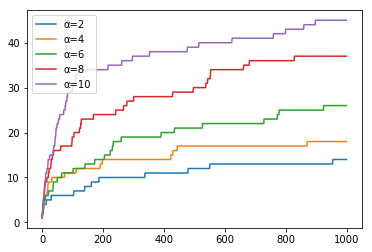

In [18]:
import matplotlib.pyplot as plt
for alpha in [2,4,6,8,10]:
    crp = CRP(alpha)
    crp.sit_process(1000)
    plt.plot(np.arange(1001),crp.table_num,label="α={}".format(alpha))
plt.legend() 
plt.show()

In [22]:
class PYP:
    def __init__(self,alpha,beta):
        self.alpha = alpha
        self.beta = beta
        self.ni = [1]
        self.z = [0]
        self.table_num = [1]
        
    def sit_process(self,max_iter):
        for t in range(max_iter):
            p_z = np.hstack((np.array(self.ni)-self.beta,np.array(self.alpha+self.beta*self.table_num[-1])))
        
            new_z = np.random.multinomial(1, p_z / p_z.sum()).argmax()
            
            self.z.append(new_z)
            
            if new_z == self.table_num[-1]:
                self.ni.append(1)
                self.table_num.append(self.table_num[-1]+1)
            else:
                self.ni[new_z] += 1
                self.table_num.append(self.table_num[-1])




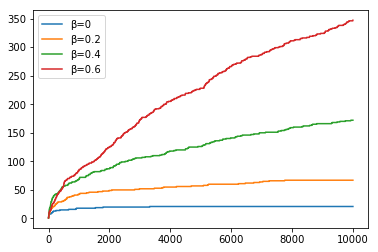

In [33]:
for beta in [0,0.2,0.4,0.6]:
    pyp = PYP(2,beta)
    pyp.sit_process(10000)
    plt.plot(np.arange(10001),pyp.table_num,label="β={}".format(beta))
plt.legend() 
plt.show()

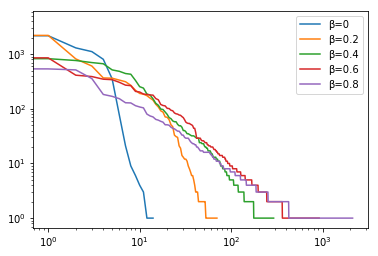

In [36]:
for beta in [0,0.2,0.4,0.6,0.8]:
    pyp = PYP(2,beta)
    pyp.sit_process(10000)
    plt.plot(np.arange(len(pyp.ni)),sorted(pyp.ni)[::-1],label="β={}".format(beta))
    plt.xscale("log")
    plt.yscale("log")
plt.legend() 
plt.show()